In [1]:
#import cupy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("train.csv")

In [3]:
df_test = pd.read_csv("test.csv")

In [4]:
df = pd.concat([df_train,df_test])

<Axes: >

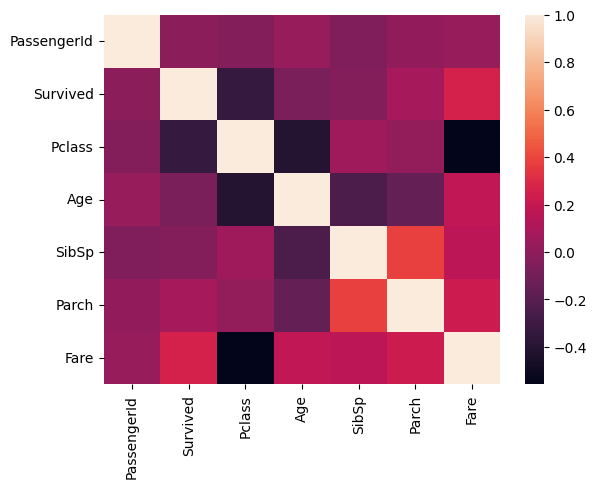

In [5]:
sns.heatmap(df.corr(numeric_only=True))

In [6]:
#label encode sex,embarked

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
encoded = oe.fit_transform(df[['Embarked','Sex']].values)
encoded_df = pd.DataFrame(encoded, columns=['Embarked','Sex'])
df3 = df.drop(['Embarked','Sex'],axis=1)
df3.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)
df2=pd.concat([df3,encoded_df],axis=1)


In [7]:
df2["Age"] = df2["Age"].fillna(df2.groupby(["Pclass","Sex"])["Age"].transform("mean"))
df["Fare"] = df["Fare"].fillna(df.groupby(["Pclass", "Sex"])["Fare"].transform("median"))
df2["Embarked"]=df2["Embarked"].fillna(2.0)
df2.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
Sex               0
dtype: int64

<Figure size 800x600 with 0 Axes>

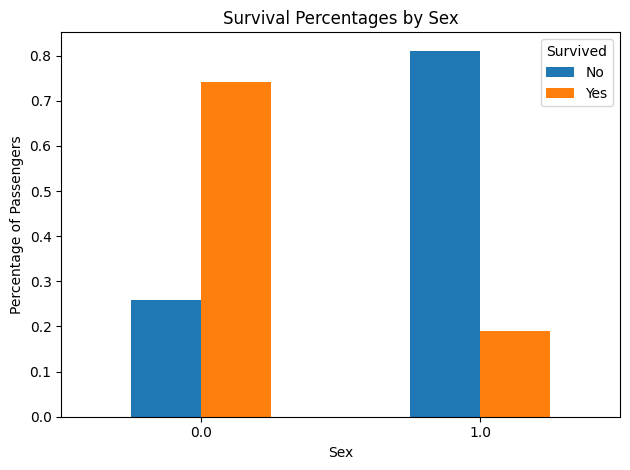

Survival Counts by Sex:
Survived  0.0  1.0
Sex               
0.0        81  233
1.0       468  109




<Figure size 800x600 with 0 Axes>

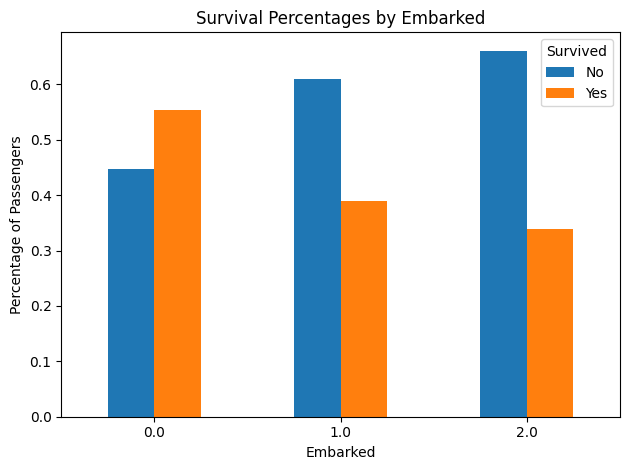

Survival Counts by Embarked:
Survived  0.0  1.0
Embarked          
0.0        75   93
1.0        47   30
2.0       427  219




<Figure size 800x600 with 0 Axes>

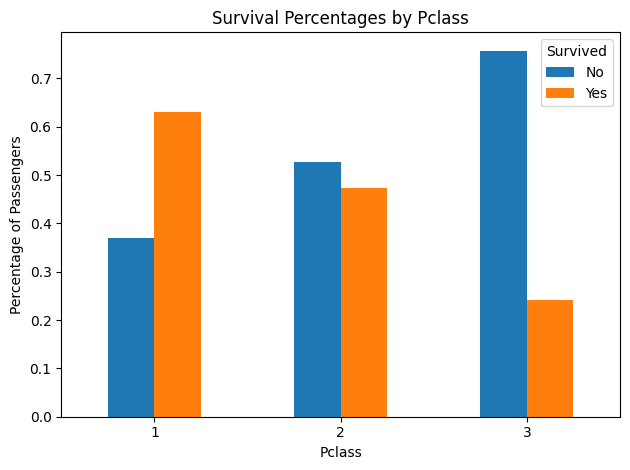

Survival Counts by Pclass:
Survived  0.0  1.0
Pclass            
1          80  136
2          97   87
3         372  119




<Figure size 800x600 with 0 Axes>

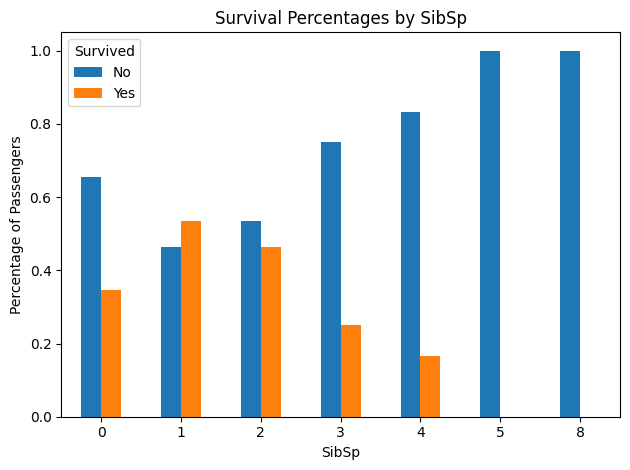

Survival Counts by SibSp:
Survived    0.0    1.0
SibSp                 
0         398.0  210.0
1          97.0  112.0
2          15.0   13.0
3          12.0    4.0
4          15.0    3.0
5           5.0    NaN
8           7.0    NaN




<Figure size 800x600 with 0 Axes>

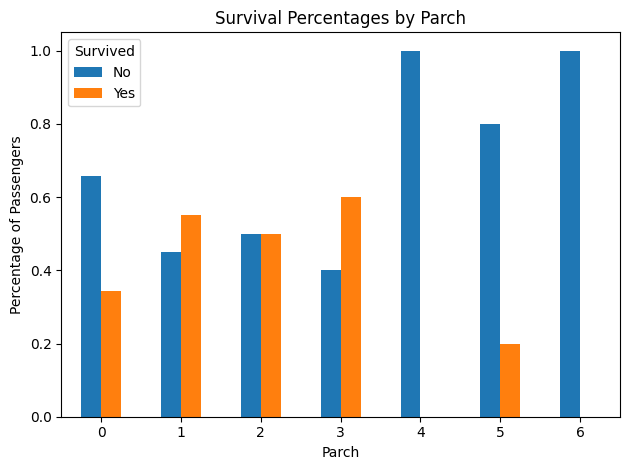

Survival Counts by Parch:
Survived    0.0    1.0
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    NaN
5           4.0    1.0
6           1.0    NaN




In [8]:
categorical_columns = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

for column in categorical_columns:
    # Group by the categorical column and calculate the proportion of survivors
    survival_counts = df2.groupby([column, 'Survived']).size().unstack()
    survival_percentages = survival_counts.div(survival_counts.sum(axis=1), axis=0)  # Convert counts to percentages

    # Plotting
    plt.figure(figsize=(8, 6))  # Set the figure size
    survival_percentages.plot(kind='bar', stacked=False)
    plt.title(f'Survival Percentages by {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage of Passengers')
    plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
    plt.legend(title='Survived', labels=['No', 'Yes'])  # Legend labels
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

    print(f"Survival Counts by {column}:")
    print(survival_counts)
    print("\n")  # Add a blank line for better readability

In [9]:
#df2.loc[(df2['Pclass'] == 1 ) | (df2['Pclass']==2) ,'Pclass_2']=0
#df2.loc[df2['Pclass'] == 3,'Pclass_2'] = 1
#df2=df2.drop(columns='Pclass')

In [10]:
# ----------- Family -------------
# Family = SibSp + Parch + 1 を特徴量とし、グルーピング
df2['Family_size']=df2['SibSp']+df2['Parch']+1
df2.loc[ df2["Family_size"] == 1, "Family_size"] = 0                            # 独り身
df2.loc[(df2["Family_size"] > 1) & (df2["Family_size"] <= 4), "Family_size"] = 1  # 小家族 
df2.loc[(df2["Family_size"] > 4) & (df2["Family_size"] <= 6), "Family_size"] = 2  # 中家族
df2.loc[df2["Family_size"]  > 6, "Family_size"] = 3                             # 大家族
df2=df2.drop(columns=['SibSp','Parch'])

In [11]:
#Ticket_Count = dict(df2['Ticket'].value_counts())
#df2['TicketGroup'] = df2['Ticket'].map(Ticket_Count)
#df2.loc[(df2['TicketGroup']>=2) & (df2['TicketGroup']<=4), 'Ticket_label'] = 2
#df2.loc[(df2['TicketGroup']>=5) & (df2['TicketGroup']<=8) | (df2['TicketGroup']==1), 'Ticket_label'] = 1  
#df2.loc[(df2['TicketGroup']>=11), 'Ticket_label'] = 0
#df2=df2.drop(columns='TicketGroup')
from sklearn.preprocessing import StandardScaler


df2["Ticket"] = df2.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == "LINE" else x[:][-1])
df2.Ticket = df2.Ticket.values.astype("int64")
scaler = StandardScaler()
df2['Ticket'] = scaler.fit_transform(np.array(df2['Ticket'].values).reshape(-1, 1))
df2['Age'] = scaler.fit_transform(np.array(df2['Age'].values).reshape(-1, 1))



In [12]:
from sklearn.calibration import LabelEncoder


#cut_Age = pd.cut(df2["Age"], 4)
#df2["Age"] = LabelEncoder().fit_transform(cut_Age) 
#cross_Age = pd.crosstab(df2["Age"], df2["Survived"], normalize='index')
#cross_Age.plot.bar(figsize=(10, 5))


#cut_Fare= pd.cut(df["Fare"],4)
#df2["Fare"] = LabelEncoder().fit_transform(cut_Fare)
#cross_Fare = pd.crosstab(df2["Fare"], df2["Survived"], normalize='index')
#cross_Fare.plot.bar(figsize=(10, 5)) 



In [13]:
df2=df2.drop(columns='Ticket')
df2=df2.drop(columns='Cabin')


In [14]:
df3=df2.copy()
df3['Title'] = df3['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
print(df3['Title'].value_counts())


df4=df3.copy()
other = ["Rev","Dr","Major", "Col", "Capt","Jonkheer","the Countess"]
df4["Title"] = df4["Title"].replace(["Ms", "Mlle","Mme","Lady"], "Miss")
df4["Title"] = df4["Title"].replace(["Countess","Dona"], "Mrs")
df4["Title"] = df4["Title"].replace(["Don","Sir"], "Mr")
df4["Title"] = df4["Title"].replace(other,"Other")
print(df4['Survived'].dtype)
df4.groupby("Title")['Survived'].mean()



Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64
float64


Title
Master    0.575000
Miss      0.705882
Mr        0.157996
Mrs       0.792000
Other     0.300000
Name: Survived, dtype: float64

In [15]:
df4.head()

,PassengerId,Survived,Pclass,Name,Age,Fare,Embarked,Sex,Family_size,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",-0.560331,7.2500,2.0,1.0,1,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.655107,71.2833,0.0,0.0,1,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",-0.256471,7.9250,2.0,0.0,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.427212,53.1000,2.0,0.0,1,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0.427212,8.0500,2.0,1.0,0,Mr


In [16]:
survival_rates = df4.groupby(['Sex', 'Age', 'Family_size','Pclass'])['Survived'].agg(['sum', 'count'])
survival_rates['Survival_Rate'] = survival_rates['sum'] / survival_rates['count']

pd.set_option('display.max_rows', None)

# 結果を表示
survival_rates

sum  count  Survival_Rate
Sex Age       Family_size Pclass                            
0.0 -2.218643 1           3        0.0      0            NaN
    -2.174584 1           3        2.0      2       1.000000
    -2.161670 1           2        0.0      0            NaN
    -2.155593 1           2        0.0      0            NaN
                          3        2.0      2       1.000000
    -2.079628 1           1        0.0      1       0.000000
                          2        1.0      1       1.000000
                          3        1.0      2       0.500000
              2           3        0.0      1       0.000000
              3           3        0.0      1       0.000000
    -2.003663 1           2        1.0      1       1.000000
                          3        0.0      0            NaN
              2           3        0.0      1       0.000000
    -1.927698 1           2        2.0      2       1.000000
                          3        3.0      3       1.000000
    -1.851733 0           3        1.0      1       1.000000
              1           2        1.0      1       1.000000
                          3        1.0      1       1.000000
              3           3        1.0      1       1.000000
    -1.775768 1           2        1.0      1       1.000000
              3           3        0.0      1       0.000000
    -1.699803 1           2        1.0      1       1.000000
    -1.623839 1           2        1.0      1       1.000000
              2           3        0.0      1       0.000000
    -1.547874 1           3        0.0      1       0.000000
              2           3        0.0      2       0.000000
              3           3        0.0      1       0.000000
    -1.471909 1           3        0.0      1       0.000000
              3           3        0.0      0            NaN
    -1.395944 3           3        0.0      1       0.000000
    -1.319979 0           2        0.0      0            NaN
              1           2        0.0      0            NaN
    -1.244014 0           3        1.0      1       1.000000
              1           2        1.0      1       1.000000
    -1.168050 0           3        0.0      1       0.000000
              1           1        1.0      1       1.000000
                          2        1.0      1       1.000000
                          3        1.0      1       1.000000
    -1.130067 1           3        0.0      1       0.000000
    -1.092085 0           3        2.0      2       1.000000
              1           1        1.0      1       1.000000
                          2        0.0      0            NaN
                          3        1.0      1       1.000000
    -1.016120 0           1        1.0      1       1.000000
                          3        2.0      2       1.000000
              1           1        2.0      2       1.000000
                          3        0.0      0            NaN
              3           3        0.0      1       0.000000
    -0.940155 0           2        2.0      2       1.000000
                          3        0.0      1       0.000000
              1           1        2.0      2       1.000000
                          3        0.0      0            NaN
              3           3        1.0      1       1.000000
    -0.864190 0           3        2.0      4       0.500000
              1           1        2.0      2       1.000000
                          2        2.0      2       1.000000
                          3        1.0      4       0.250000
              2           1        1.0      1       1.000000
    -0.826208 0           3        0.0      0            NaN
    -0.788225 0           1        1.0      1       1.000000
                          2        1.0      1       1.000000
                          3        1.0      1       1.000000
              1           1        2.0      2       1.000000
                          2        1.0      1       1.000000
         

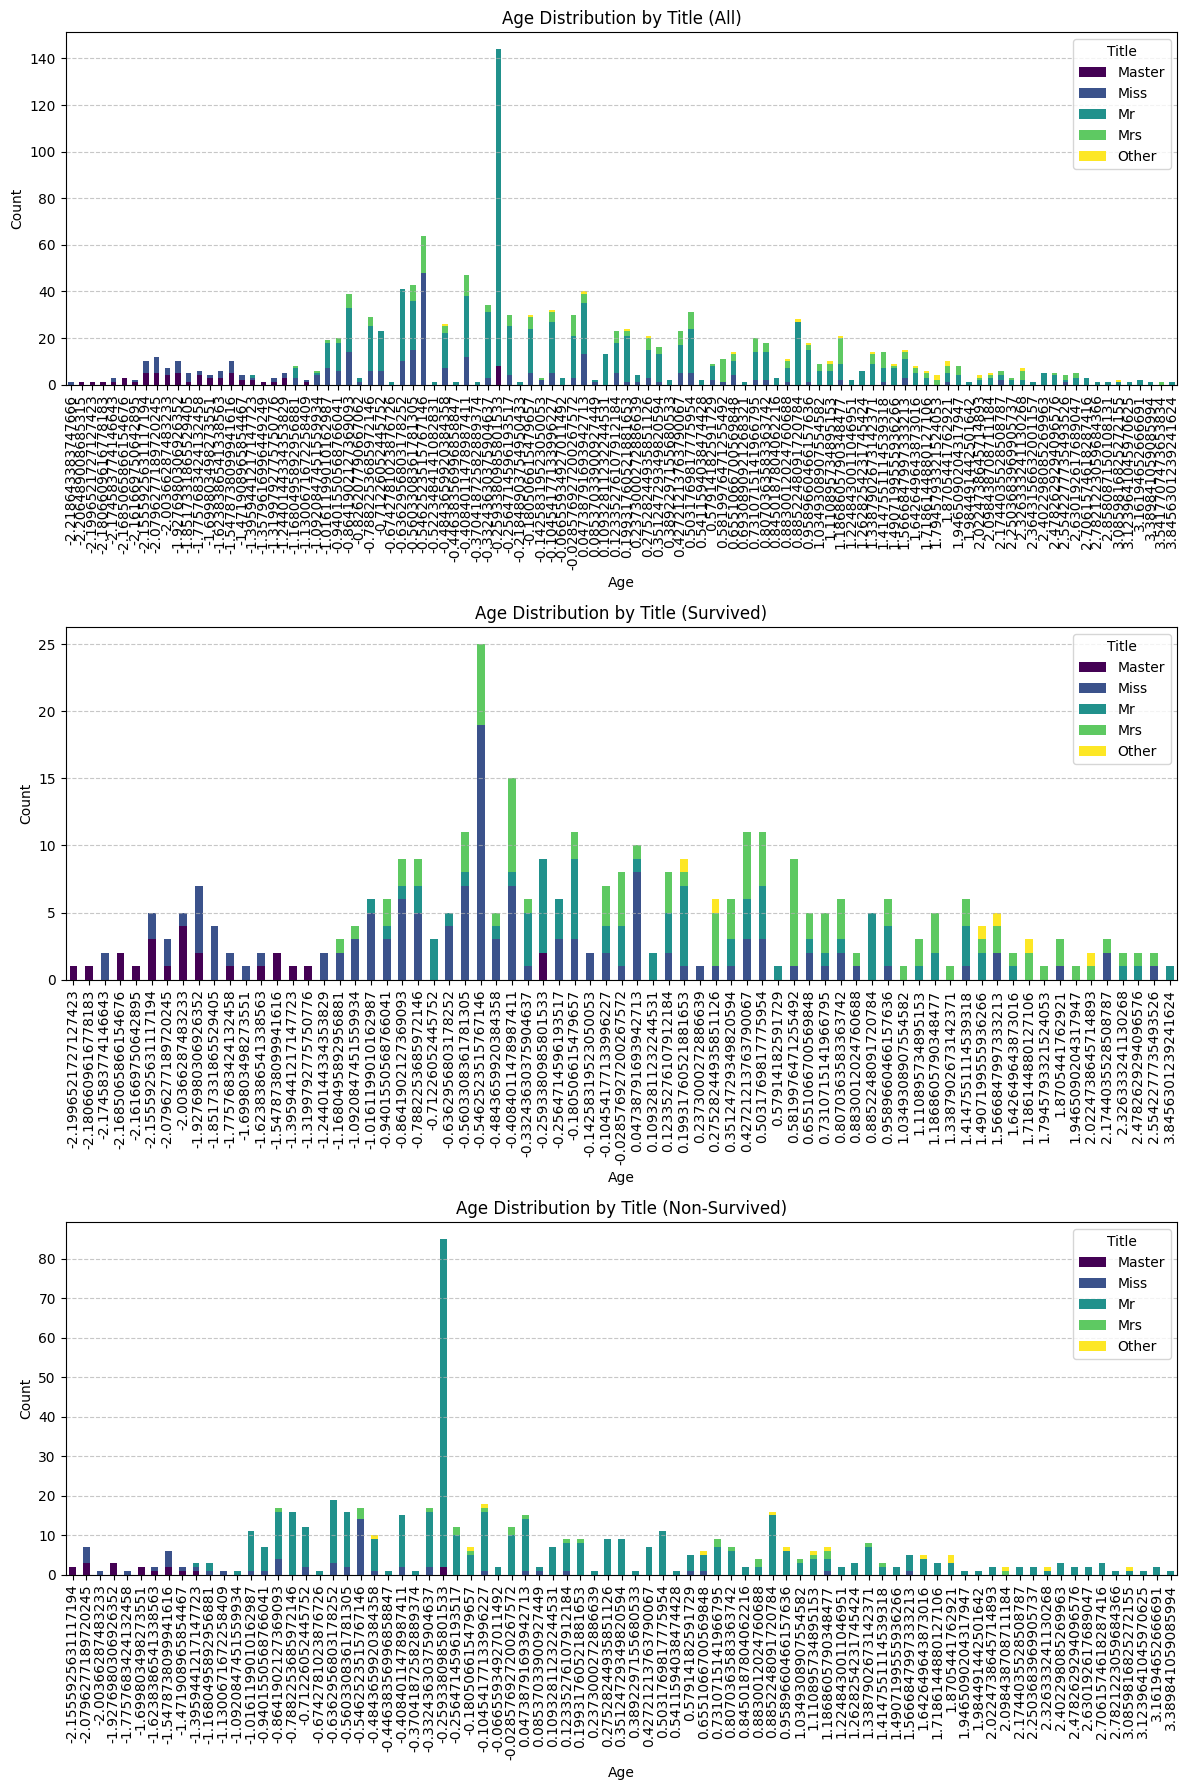

In [17]:
by_title_survived = df4[df4['Survived'] == 1].groupby(['Age', 'Title']).size().unstack()
by_title_non_survived = df4[df4['Survived'] == 0].groupby(['Age', 'Title']).size().unstack()

# Set up the plot
fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # Create a 3-row subplot

# Plot for all data (if needed)
by_title2 = df4.groupby(['Age', 'Title']).size().unstack()
by_title2.plot(kind='bar', stacked=True, colormap='viridis', ax=axs[0])
axs[0].set_title('Age Distribution by Title (All)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[0].legend(title='Title')
axs[0].tick_params(axis='x', rotation=90)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for survived
by_title_survived.plot(kind='bar', stacked=True, colormap='viridis', ax=axs[1])
axs[1].set_title('Age Distribution by Title (Survived)')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Count')
axs[1].legend(title='Title')
axs[1].tick_params(axis='x', rotation=90)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for non-survived
by_title_non_survived.plot(kind='bar', stacked=True, colormap='viridis', ax=axs[2])
axs[2].set_title('Age Distribution by Title (Non-Survived)')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Count')
axs[2].legend(title='Title')
axs[2].tick_params(axis='x', rotation=90)
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()  # Adjust layout
plt.show()

In [18]:
# F_S_Suc
# 女性または子どもの家族の生存率を表す説明変数"F_S_Suc"作成
# "Name"の最初を取得
df4["TopName"] = df4["Name"].map(lambda name: name.split(",")[0].strip())

# 女性または子どもはTrue
df4["W_C"] = ((df4.Title == "Master") | (df4.Sex == 1))
# 女性または子ども以外はTrue
df4["M"] = ~((df4.Title == "Master") | (df4.Sex == 1))

# 具体的な家族の生存データ
family = df4.groupby(["TopName", "Pclass"])["Survived"]

df4["F_Total"] = family.transform(lambda s: s.fillna(0).count())
df4["F_Total"] = df4["F_Total"].mask(df4["W_C"], (df4["F_Total"] - 1), axis=0)
df4["F_Total"] = df4["F_Total"].mask(df4["M"], (df4["F_Total"] - 1), axis=0)

df4["F_Survived"] = family.transform(lambda s: s.fillna(0).sum())
df4["F_Survived"] = df4["F_Survived"].mask(df4["W_C"], df4["F_Survived"] - df4["Survived"].fillna(0), axis=0)
df4["F_Survived"] = df4["F_Survived"].mask(df4["M"], df4["F_Survived"] - df4["Survived"].fillna(0), axis=0)

df4["F_S_Suc"] = (df4["F_Survived"] / df4["F_Total"].replace(0, np.nan))
df4["F_S_Suc"].fillna(-1, inplace=True)

# 女性または子ども(True)とそれ以外の人(False)の生存率と生と死を合わせた総人数を調査（家族の生存率ごと）
s_df = df4.groupby(["F_S_Suc", "W_C"])["Survived"].agg(["mean", "count"])
s_df

# "F_S_Suc"の計算で使用した説明変数の削除
df4=df4.drop(["TopName", "W_C", "M", "F_Total", "F_Survived"], axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_36344\192724652.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4["F_S_Suc"].fillna(-1, inplace=True)


In [19]:
#unique_titles = df4['Title'].unique()
#print(unique_titles)
#title_dummies = pd.get_dummies(df4['Title'], prefix='Title')
#df4 = pd.concat([df4, title_dummies], axis=1)
#df4.drop(columns=['Title'], inplace=True)
#print(title_dummies.head())


<Axes: >

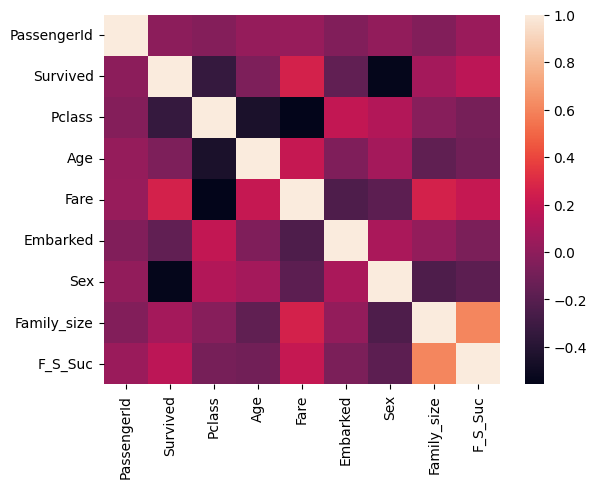

In [20]:
sns.heatmap(df4.corr(numeric_only=True))

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df5 = df4.copy()
df5['Fare'] = scaler.fit_transform(np.array(df5['Fare'].values).reshape(-1, 1))
#df5.drop(columns='Sex')
df5=df5.drop(columns=['Name','Embarked','Title'])


In [22]:
df5 = pd.get_dummies(df5, columns=["Sex"], drop_first=True)
df5 = pd.get_dummies(df5, columns=["Pclass"])


In [23]:
df5.head(5)


,PassengerId,Survived,Age,Fare,Family_size,F_S_Suc,Sex_1.0,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,-0.560331,-0.503402,1,0.0,True,False,False,True
1,2,1.0,0.655107,0.734222,1,0.0,False,True,False,False
2,3,1.0,-0.256471,-0.490356,0,-1.0,False,False,False,True
3,4,1.0,0.427212,0.382778,1,0.0,False,True,False,False
4,5,0.0,0.427212,-0.487940,0,-1.0,True,False,False,True


In [24]:
train = df5[~df5["Survived"].isnull()]
test = df5[df5["Survived"].isnull()]
test = test.drop(columns="Survived")
print(train.isnull().sum())
print(test.isnull().sum())
print(train.shape)
print(test.shape)

PassengerId    0
Survived       0
Age            0
Fare           0
Family_size    0
F_S_Suc        0
Sex_1.0        0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64
PassengerId    0
Age            0
Fare           1
Family_size    0
F_S_Suc        0
Sex_1.0        0
Pclass_1       0
Pclass_2       0
Pclass_3       0
dtype: int64
(891, 10)
(418, 9)


In [25]:
X = train.drop(columns=["Survived","PassengerId"])
y = train["Survived"]

正解率： 0.8271604938271605


C:\Users\User\AppData\Local\Temp\ipykernel_36344\1137062952.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",


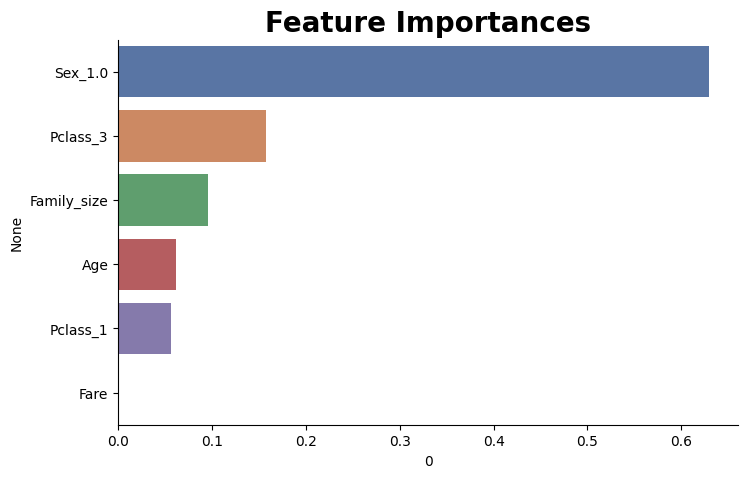

In [26]:
# ----------- 推定モデル構築 ---------------
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
x_test = test.drop(columns=["PassengerId"])

#決定木
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
#学習
decision_tree.fit(X, y)
#推論
y_pred = decision_tree.predict(X)

#正解率： 0.8125701459034792
print("正解率：", accuracy_score(y, y_pred))

#提出データ1
y_pred = decision_tree.predict(x_test)

#説明変数の重要度をグラフで表示（決定木）
importances = pd.DataFrame(decision_tree.feature_importances_, index = X.columns)
importances.sort_values(by = 0, inplace=True, ascending = False)
importances = importances.iloc[0:6,:] 
plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",
                                                                                 fontdict= { 'fontsize': 20,
                                                                                            'fontweight':'bold'});
sns.despine()


正解率： 0.8282828282828283


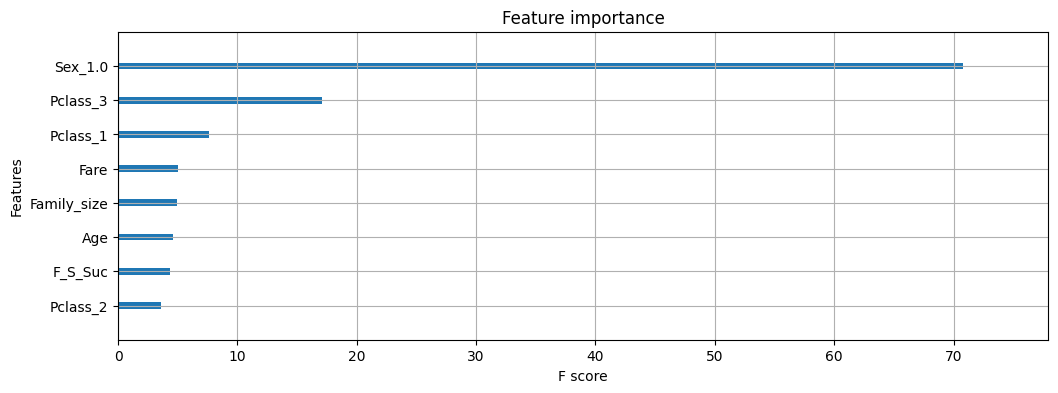

In [27]:
import xgboost as xgb

#xgboost
dtrain = xgb.DMatrix(X, label=y)
dtest = xgb.DMatrix(x_test)
#パラメータ
params = {'colsample_bytree': 0.5, 
         'learning_rate': 0.1, 
         'max_depth': 3, 
         'subsample': 0.9, 
         "objective":"multi:softmax", 
         "num_class":2}
#学習
bst = xgb.train(
    params, 
    dtrain, 
    num_boost_round=10)

#推論
y_pred_2 = bst.predict(dtrain)

#正解率： 0.8215488215488216
print("正解率：",accuracy_score(y, y_pred_2))

#提出データ2
y_pred_2 = bst.predict(dtest)

#説明変数の重要度をグラフで表示（xgboost）
fig, ax = plt.subplots(figsize=(12, 4))
"""
mapper = {'f{0}'.format(i): v for i, v in enumerate(train_names)}
mapped = {mapper[k]: v for k, v in bst.get_score(importance_type="gain").items()}

xgb.plot_importance(mapped,
                    ax=ax, 
                    show_values=False)
"""
xgb.plot_importance(bst,
                    ax=ax, 
                    show_values=False, 
                    importance_type="gain")
plt.show()

   train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
0           0.195285          0.012607          0.209886         0.007863
1           0.182940          0.009069          0.202021         0.012819
2           0.173681          0.004961          0.184044         0.011662
3           0.171998          0.005211          0.179556         0.010910
4           0.171155          0.004114          0.179556         0.010910
5           0.171436          0.003203          0.180679         0.009311
6           0.165825          0.005047          0.185174         0.010434
7           0.166106          0.006561          0.178426         0.016115
8           0.165545          0.005261          0.180679         0.011161
9           0.166105          0.003383          0.181803         0.013345
最終的なクロスバリデーションの平均誤り率:  0.18180277446487977
正解率（トレーニングデータ）： 0.8282828282828283


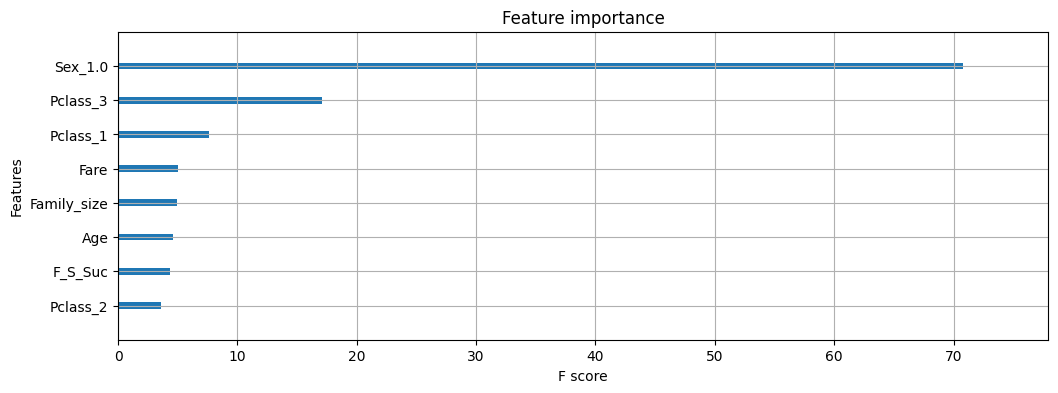

In [28]:
dtrain_cv = xgb.DMatrix(X, label=y)

# パラメータ設定
params_cv = {
    'colsample_bytree': 0.5, 
    'learning_rate': 0.1, 
    'max_depth': 3, 
    'subsample': 0.9, 
    "objective": "multi:softmax", 
    "num_class": 2
}

# クロスバリデーションの設定と実行
cv_results = xgb.cv(
    params_cv,
    dtrain_cv,
    num_boost_round=10,
    nfold=5,  # 5分割クロスバリデーション
    metrics="merror",  # マルチクラスの誤り率
    as_pandas=True,
    seed=42
)

# クロスバリデーション結果を表示
print(cv_results)
print("最終的なクロスバリデーションの平均誤り率: ", cv_results['test-merror-mean'].iloc[-1])

# クロスバリデーション後の最終モデルの構築
final_model = xgb.train(params_cv, dtrain_cv, num_boost_round=10)
y_pred_train = final_model.predict(dtrain_cv)
print("正解率（トレーニングデータ）：", accuracy_score(y, y_pred_train))

# テストデータでの予測
dtest_final = xgb.DMatrix(x_test)
y_pred_test = final_model.predict(dtest_final)

# 特徴量の重要度をグラフで表示
fig, ax = plt.subplots(figsize=(12, 4))
xgb.plot_importance(final_model, ax=ax, show_values=False, importance_type="gain")
plt.show()

In [29]:
x_test = test.drop(columns=["PassengerId"])
#y_test_pred = log_model.predict(x_test)

In [30]:
test['Survived'] = y_pred_2

In [31]:
submit_df = test[["PassengerId","Survived"]].set_index("PassengerId")
submit_df["Survived"] = submit_df["Survived"].astype(int)
submit_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [32]:
submit_df.tail()

,Survived
PassengerId,
1305,0
1306,1
1307,0
1308,0
1309,0


In [33]:
submit_df.to_csv("submission18.csv")